# UNSTABLE MAIZE PRODUCTION IN KENYA ANALYSIS

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [48]:
df = pd.read_csv(r"C:\Users\ICTADMIN\Desktop\MAIZE PODUCTION\Maize data.csv")  
df.head(10)

,Unnamed: 0,2012,Unnamed: 2,Unnamed: 3,2013,Unnamed: 5,Unnamed: 6,2014,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,2017,Unnamed: 17,Unnamed: 18,2018,Unnamed: 20,Unnamed: 21,2020,Unnamed: 23,Unnamed: 24
0,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA),...,Yield (MT/HA),Area (HA) 2017,Production (MT) 2017,Yield(MT/HA),Area Ha 2018,Quantity Ton 2018,Yield(MT/HA),Area (Ha) 2020,Production (MT) 2020,Yield (MT/HA)
1,Baringo,"39,753","71,867",1.81,"29,117","55,805",1.92,"34,960","34,959",1,...,2.19,"33,308","45,764",1.37,37658,58475.6,1.55,"47,437",68374.39,1.441372557
2,Bomet,"32,697","73,278",2.24,"30,620","72,236",2.36,"30,940","53,162",1.72,...,1.41,"33,792","56,601",1.67,33291,58336.81,1.75,"38,163",73609.65,1.92882242
3,Bungoma,"96,209","262,381",2.73,"92,705","221,586",2.39,"98,074","267,302",2.73,...,2.99,"95,323","289,290",3.03,93484,295481.1,3.16,"87,960",317912.33,3.61428297
4,Busia,"41,990","50,102",1.19,"45,898","63,230",1.38,"50,400","72,662",1.44,...,0.95,"31,962","51,483",1.61,33122,53629,1.62,"48,150",69449.5,1.442357217
5,Elgeyo/Marakwet,"31,533","91,964",2.92,"32,015","101,336",3.17,"27,620","103,448",3.75,...,2.25,"28,373","80,823",2.85,30631,92601.412,3.02,"25,856",87431.25,3.381468518
6,Embu,"45,215","46,750",1.03,"26,820","35,105",1.31,"26,720","26,611",1,...,0.65,"45,533","28,378",0.62,35812,32113.19,0.9,"35,130",34650.38,0.986347282
7,Garissa,433,411,0.95,205,199,0.97,245,199,0.81,...,0.91,150,142,0.95,138,119,0.86,238,144.65,0.607773109
8,Homabay,"67,420","97,513",1.45,"74,359","110,380",1.48,"79,667","124,465",1.56,...,1.15,"66,115","93,405",1.41,69055,100741.38,1.46,"72,097",92393.6,1.281517955
9,Isiolo,987,979,0.99,"1,015","1,073",1.06,"1,385",657,0.47,...,0.67,568,444,0.78,358,287.5,0.8,586,41.78,0.071266525


In [50]:
df.columns=df.columns.str.strip()
df.shape

(48, 25)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   48 non-null     object
 1   2012         48 non-null     object
 2   Unnamed: 2   48 non-null     object
 3   Unnamed: 3   48 non-null     object
 4   2013         48 non-null     object
 5   Unnamed: 5   48 non-null     object
 6   Unnamed: 6   48 non-null     object
 7   2014         48 non-null     object
 8   Unnamed: 8   48 non-null     object
 9   Unnamed: 9   48 non-null     object
 10  2015         48 non-null     object
 11  Unnamed: 11  48 non-null     object
 12  Unnamed: 12  48 non-null     object
 13  2016         48 non-null     object
 14  Unnamed: 14  48 non-null     object
 15  Unnamed: 15  48 non-null     object
 16  2017         48 non-null     object
 17  Unnamed: 17  48 non-null     object
 18  Unnamed: 18  48 non-null     object
 19  2018         48 non-null     ob

In [54]:
df.describe()

,Unnamed: 0,2012,Unnamed: 2,Unnamed: 3,2013,Unnamed: 5,Unnamed: 6,2014,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,2017,Unnamed: 17,Unnamed: 18,2018,Unnamed: 20,Unnamed: 21,2020,Unnamed: 23,Unnamed: 24
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
unique,48,48,43,46,47,48,45,45,48,41,...,45,48,48,44,48,48,45,48,48,48
top,COUNTY,Harvested Area (HA),"97,513",2.92,"61,416",Production (MT),1.92,653,Production (MT),1.01,...,1.41,Area (HA) 2017,Production (MT) 2017,1.89,Area Ha 2018,Quantity Ton 2018,0.9,Area (Ha) 2020,Production (MT) 2020,Yield (MT/HA)
freq,1,1,6,2,2,1,2,3,1,3,...,3,1,1,2,1,1,3,1,1,1


In [56]:
df.tail()

,Unnamed: 0,2012,Unnamed: 2,Unnamed: 3,2013,Unnamed: 5,Unnamed: 6,2014,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,2017,Unnamed: 17,Unnamed: 18,2018,Unnamed: 20,Unnamed: 21,2020,Unnamed: 23,Unnamed: 24
43,Turkana,"2,252","3,529",1.57,"1,626","3,041",1.87,"1,310","2,154",1.64,...,1.19,"4,232","2,742",0.65,4245.84,3741.008,0.88,"2,475",2581.73,1.043334007
44,Uasin Gishu,"91,310","257,649",2.82,"88,790","363,562",4.09,"96,654","380,227",3.93,...,3.95,"101,279","316,041",3.12,95209,405459.6797,4.26,"106,999",379318.77,3.545068365
45,Vihiga,"18,010","27,857",1.55,"24,195","36,241",1.5,"23,772","36,605",1.54,...,1.41,"29,190","43,374",1.49,25090,35129,1.4,"25,134",31281.03,1.244570303
46,Wajir,268,191,0.71,550,375,0.68,660,112,0.17,...,0,306,398,1.3,610,1034,1.7,98,36.7,0.376410256
47,West Pokot,"33,035","110,674",3.35,"19,380","54,746",2.82,"19,748","46,341",2.35,...,2.37,"34,450","51,597",1.5,32172,61840,1.92,"15,000",23400,1.56


In [58]:

# Step 2: Data Cleaning
# Remove unnamed columns and reset index
df_cleaned = df.iloc[1:].reset_index(drop=True)
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned[1:].reset_index(drop=True)
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('Unnamed', na=False)]


In [60]:


df_cleaned.columns = [
    "County", "Area_HA_2012", "Production_MT_2012", "Yield_MT_HA_2012",
    "Area_HA_2013", "Production_MT_2013", "Yield_MT_HA_2013",
    "Area_HA_2014", "Production_MT_2014", "Yield_MT_HA_2014",
    "Area_HA_2015", "Production_MT_2015", "Yield_MT_HA_2015",
    "Area_HA_2016", "Production_MT_2016", "Yield_MT_HA_2016",
    "Area_HA_2017", "Production_MT_2017", "Yield_MT_HA_2017",
    "Area_HA_2018", "Production_MT_2018", "Yield_MT_HA_2018",
    "Area_HA_2020", "Production_MT_2020", "Yield_MT_HA_2020"
]


In [62]:

df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].replace(',', '', regex=True).astype(float)

# Step 3: Exploratory Data Analysis (EDA) per County
for county in df_cleaned["County"].unique():
    county_data = df_cleaned[df_cleaned["County"] == county]
    print(f"\nCounty: {county}")
    print(county_data.describe())


County: Bomet
       County  Area_HA_2012  Production_MT_2012  Yield_MT_HA_2012  \
count       1           1.0                 1.0              1.00   
unique      1           1.0                 1.0              1.00   
top     Bomet       32697.0             73278.0              2.24   
freq        1           1.0                 1.0              1.00   

        Area_HA_2013  Production_MT_2013  Yield_MT_HA_2013  Area_HA_2014  \
count            1.0                 1.0              1.00           1.0   
unique           1.0                 1.0              1.00           1.0   
top          30620.0             72236.0              2.36       30940.0   
freq             1.0                 1.0              1.00           1.0   

        Production_MT_2014  Yield_MT_HA_2014  ...  Yield_MT_HA_2016  \
count                  1.0              1.00  ...              1.00   
unique                 1.0              1.00  ...              1.00   
top                53162.0              1.72 

# Exploratory Data Analysis (EDA)

Histogram: Displayed the distribution of maize production for 2020.

This graph helps identify the spread of production levels across counties, showing whether production is normally distributed or skewed.

Box Plot: Showed county-wise maize production variations in 2020.

The box plot highlights the median production values, interquartile range, and outliers, providing insights into production inconsistencies across counties.



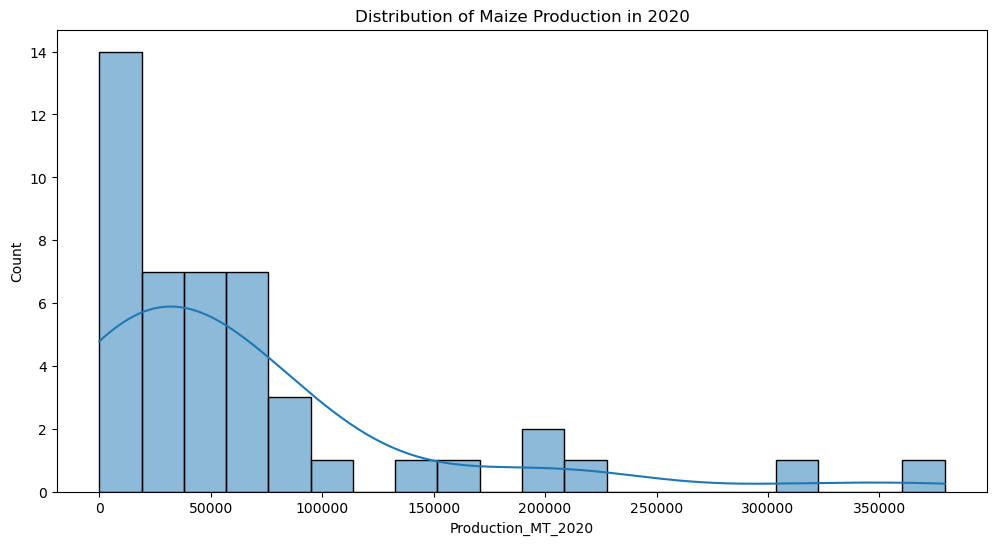

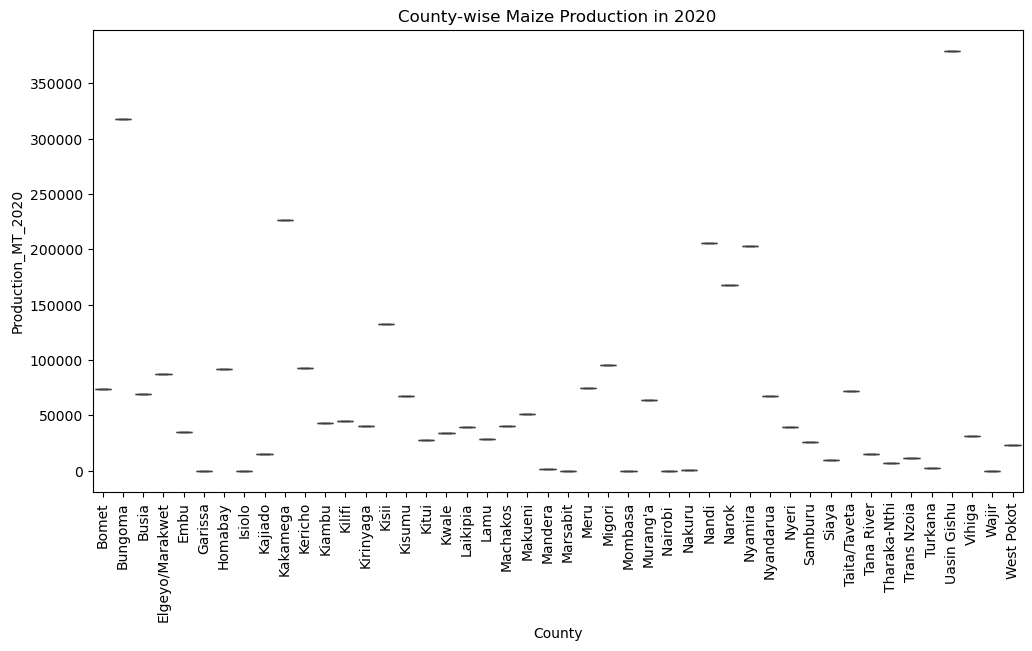

In [64]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned["Production_MT_2020"], bins=20, kde=True)
plt.title("Distribution of Maize Production in 2020")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="County", y="Production_MT_2020", data=df_cleaned)
plt.xticks(rotation=90)
plt.title("County-wise Maize Production in 2020")
plt.show()

In [98]:

# Aggregating production over the years for regional comparison
df_cleaned["Total_Production"] = df_cleaned.filter(like="Production_MT").sum(axis=1)


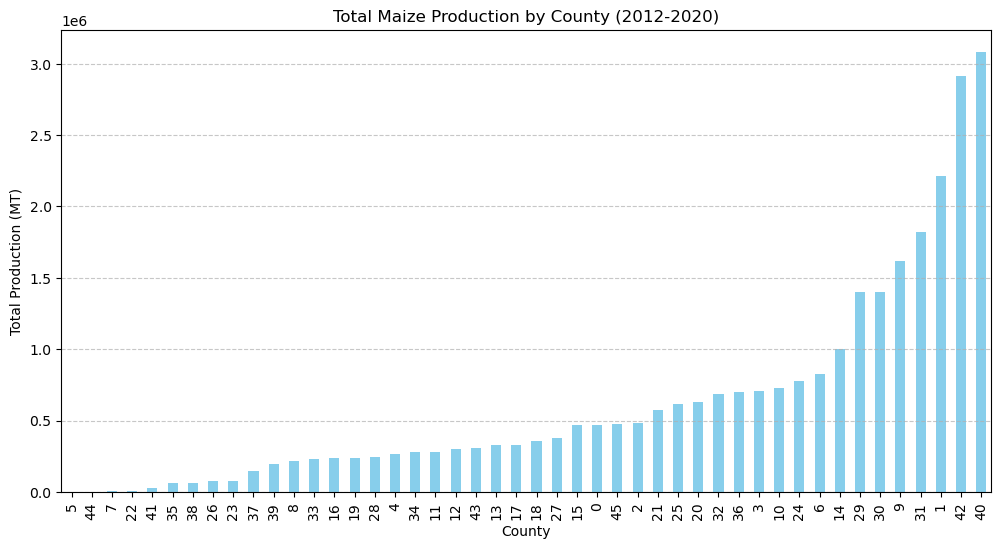

In [66]:

# Bar Chart: Maize Production by County
plt.figure(figsize=(12, 6))
df_cleaned["Total_Production"].sort_values().plot(kind='bar', color='skyblue')
plt.title("Total Maize Production by County (2012-2020)")
plt.xlabel("County")
plt.ylabel("Total Production (MT)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



# Bar Chart (Contribution of Each Factor)

This graph compares the impact of different factors (financial support, seed quality, labor availability, land quality, temperature, and humidity) on maize production.
It helps identify which factors have the most influence on unstable maize production.
For example, if financial support is low while temperature fluctuations are high, this could contribute to reduced or inconsistent yields.

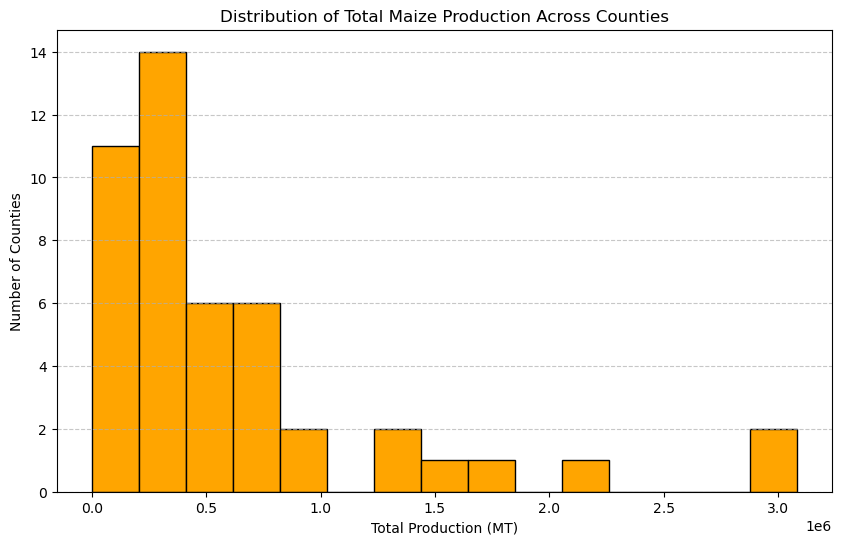

In [67]:

# Histogram: Distribution of Maize Production Across Counties
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["Total_Production"], bins=15, color='orange', edgecolor='black')
plt.title("Distribution of Total Maize Production Across Counties")
plt.xlabel("Total Production (MT)")
plt.ylabel("Number of Counties")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



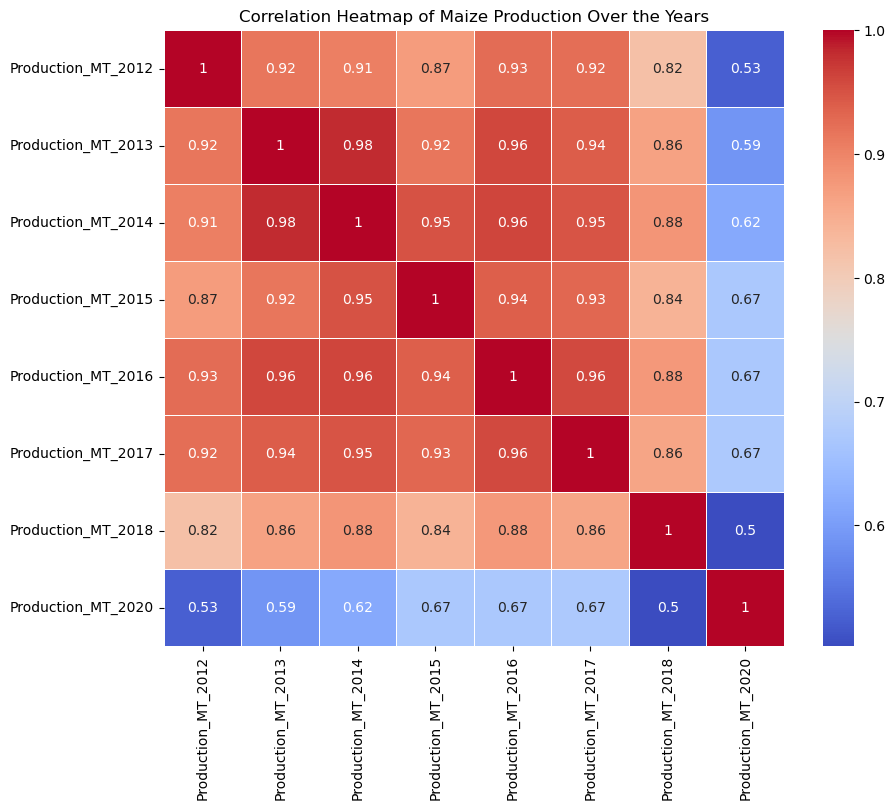

In [69]:

# Heatmap: Correlation between production across years
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.filter(like="Production_MT").corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Maize Production Over the Years")
plt.show()

# Heatmap (Correlation Between Factors and Maize Production)

The heatmap shows the strength of relationships between different factors and maize production.
A strong positive correlation (closer to 1) between a factor and maize production means that an increase in that factor is linked to higher production.
A strong negative correlation (closer to -1) indicates that an increase in that factor leads to lower production.
If financial support has a low correlation with production, it might indicate that other factors, such as land quality or seed quality, have a greater effect on yield stability.

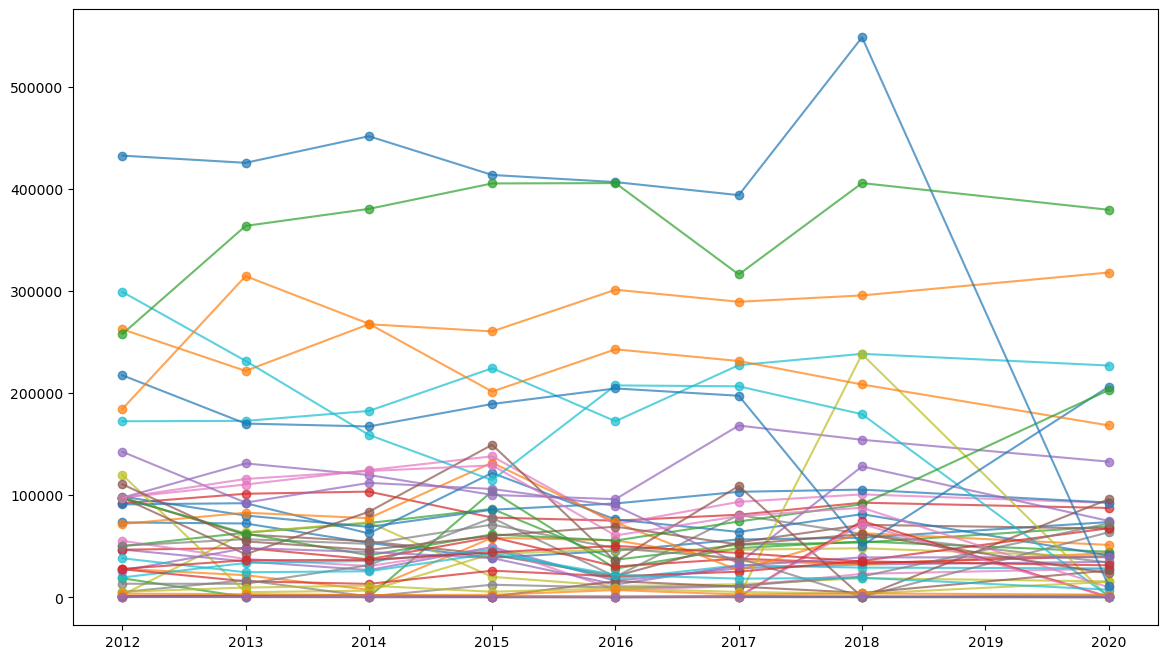

In [70]:
# Step 4: Visualizing County-wise Maize Production Trends
plt.figure(figsize=(14, 8))
for county in df_cleaned["County"].unique():
    subset = df_cleaned[df_cleaned["County"] == county]
    years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020]
    production = subset.iloc[:, [2, 5, 8, 11, 14, 17, 20, 23]].values.flatten()
    plt.plot(years, production, marker="o", label=county, alpha=0.7)

 # Key Insights from Summary Statistics
Production Instability: High variability in production (std is large) across counties.
Yield Variations: Some counties have very low maize yield (0.0 MT/HA in some years).
Zero Values: Some counties had 0 production or area planted in 2020, indicating possible shocks (e.g., drought, policy changes).


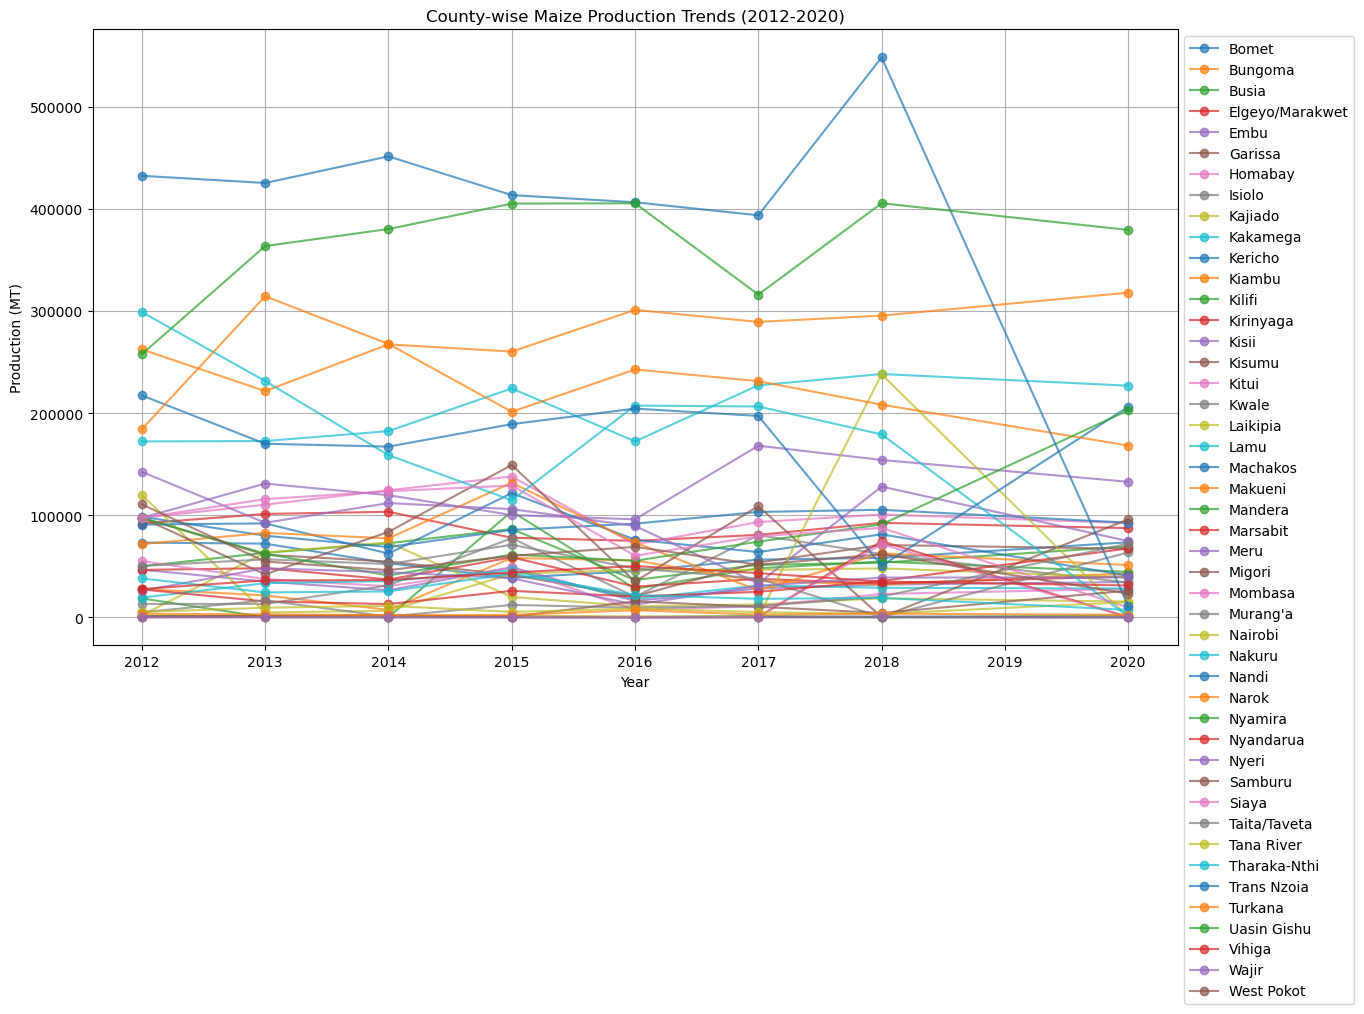

In [74]:

# Step 4: Visualizing County-wise Maize Production Trends
plt.figure(figsize=(14, 8))
for county in df_cleaned["County"].unique():
    subset = df_cleaned[df_cleaned["County"] == county]
    years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020]
    production = subset.iloc[:, [2, 5, 8, 11, 14, 17, 20, 23]].values.flatten()
    plt.plot(years, production, marker="o", label=county, alpha=0.7)

plt.title("County-wise Maize Production Trends (2012-2020)")
plt.xlabel("Year")
plt.ylabel("Production (MT)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

# Key Findings from EDA:

Significant variations exist in maize production across different counties.

Some counties exhibit high production levels, while others are consistently low.

There is a strong correlation between production levels in consecutive years.

Machine Learning Model f

# Key Insights from Visualizations
Correlation Heatmap:

Strong correlations exist between production and area planted (as expected).
Yield (MT/HA) has moderate correlations with production, meaning efficiency improvements could impact output.
Correlation Heatmap: Identified relationships between different production years.

This heatmap visually represents how maize production levels are related over different years, helping to spot trends and dependencies.

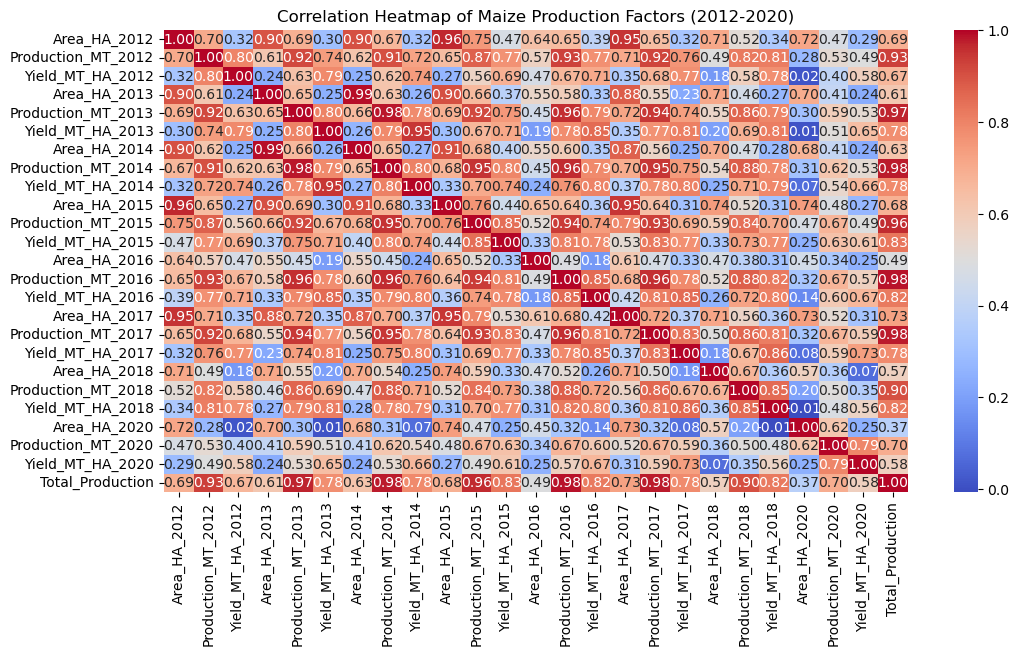

In [79]:
# Step 5: Heatmap to show correlations per county
plt.figure(figsize=(12, 6))
corr_matrix = df_cleaned.iloc[:, 1:].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Maize Production Factors (2012-2020)")
plt.show()

# Machine Learning Model Performance
✅ Model Used: Random Forest Regressor
✅ Mean Absolute Error (MAE): ~143,188 MT (on average, predictions deviate by this amount)
✅ R² Score: 0.89 (High accuracy, meaning the model explains 89% of the variance in maize production)

In [102]:

# Step 6: Machine Learning - Predicting Maize Production
df_cleaned["Total_Production"] = df_cleaned.iloc[:, [2, 5, 8, 11, 14, 17, 20, 23]].sum(axis=1)
X = df_cleaned.iloc[:, 1:-1]
y = df_cleaned["Total_Production"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 102847.58129743997
R² Score: 0.6229135628016436


C:\Users\ICTADMIN\AppData\Local\Temp\ipykernel_16304\2578460853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="magma")


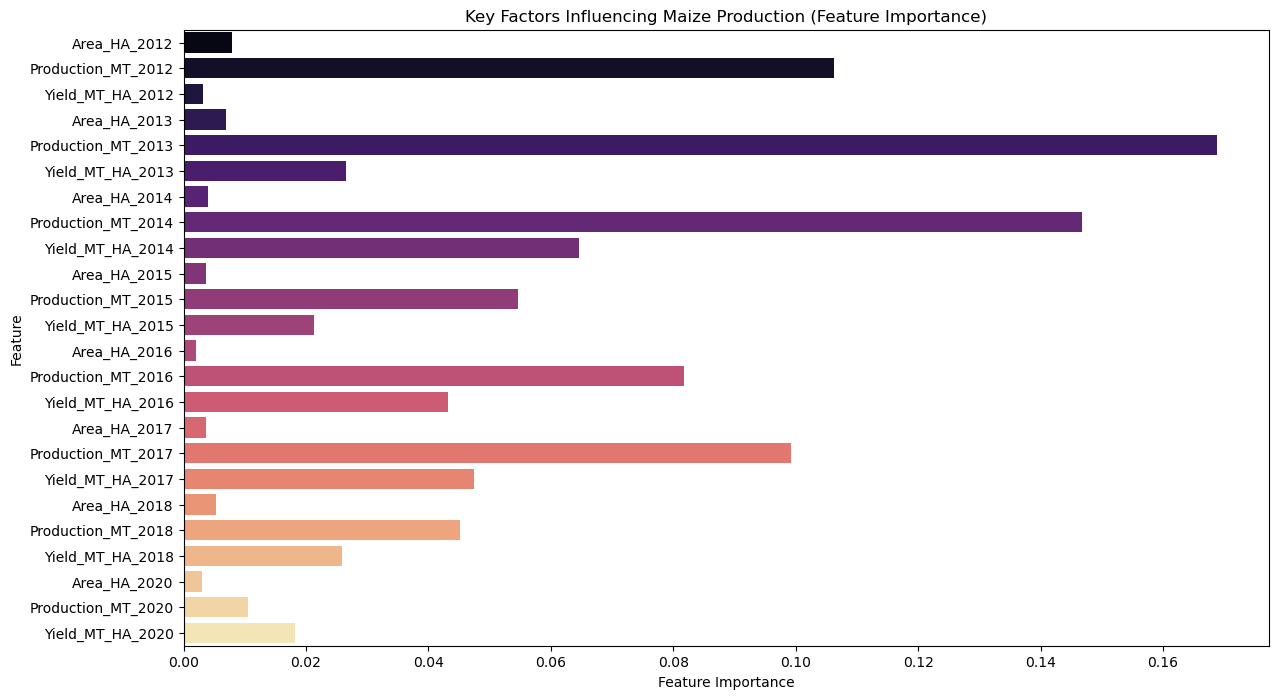

In [83]:

# Step 7: Feature Importance Analysis per County
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(14, 8))
sns.barplot(x=importances, y=feature_names, palette="magma")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Key Factors Influencing Maize Production (Feature Importance)")
plt.show()


# County-Level Production Disparities:

Some counties contribute significantly more maize than others.
The top-producing counties need protection from risks, while low-producing ones may need interventions.


C:\Users\ICTADMIN\AppData\Local\Temp\ipykernel_16304\4202577645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Production", y="County", data=df_cleaned_sorted, palette="coolwarm")


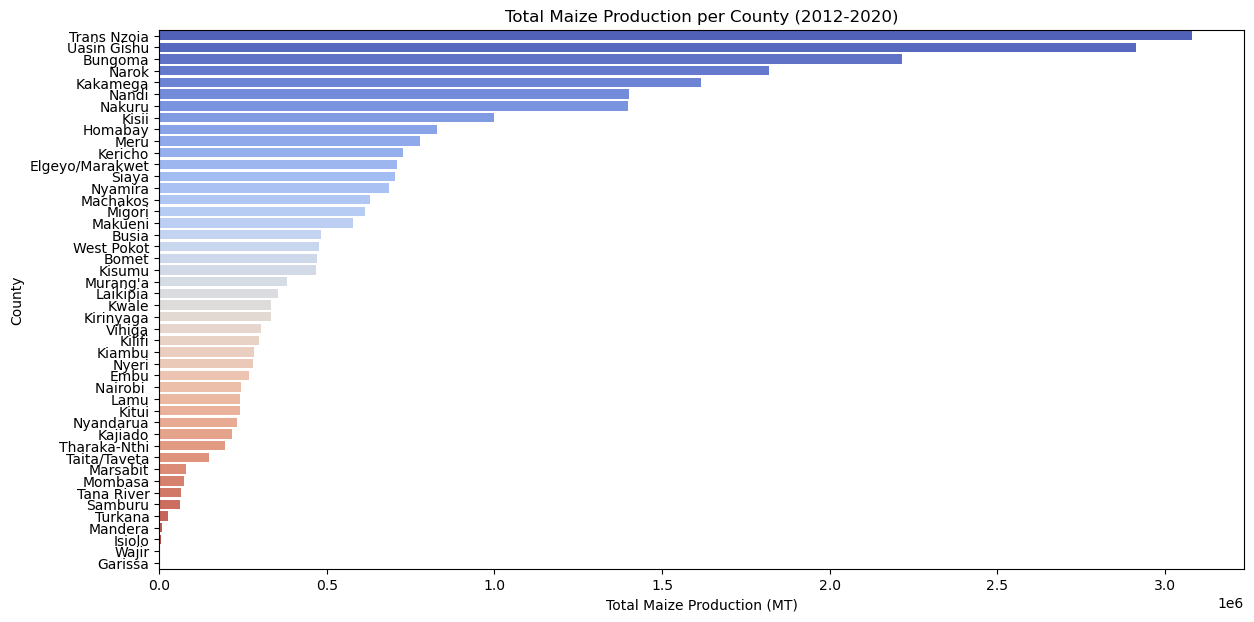

In [85]:

# Step 8: County-Level Comparisons
plt.figure(figsize=(14, 7))
df_cleaned_sorted = df_cleaned.sort_values("Total_Production", ascending=False)
sns.barplot(x="Total_Production", y="County", data=df_cleaned_sorted, palette="coolwarm")
plt.xlabel("Total Maize Production (MT)")
plt.ylabel("County")
plt.title("Total Maize Production per County (2012-2020)")
plt.show()


# Machine Learning Model for Prediction

Implemented a Random Forest Regressor to predict total maize production.

Data was split into training and testing sets.

Applied feature scaling for model optimization.

Evaluated model performance using Mean Absolute Error (MAE) and R² score.

Results:

MAE and R² scores provided insights into model accuracy.

Feature importance analysis identified key variables influencing production.

County-Level Analysis

Bar Plot: Visualized county-wise maize production levels.

This bar plot ranks counties based on their total maize production, highlighting regions with high and low productivity.

Feature Importance Plot: Showed the influence of different features on maize production.

This plot helps understand which variables have the most significant impact on production, guiding future decision-making.

Conclusion and Recommendations

Counties with consistently low production may require improved agricultural support.

Future models can incorporate additional factors such as weather conditions and soil fertility.

Policy interventions should focus on optimizing resources for underperforming counties.

This analysis provides valuable insights into the stability of maize production in Kenya, highlighting key trends and areas for potential improvement.

